In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df1.shape

(10000, 11)

Text(0.5, 1.0, 'Count of Churn of Customers')

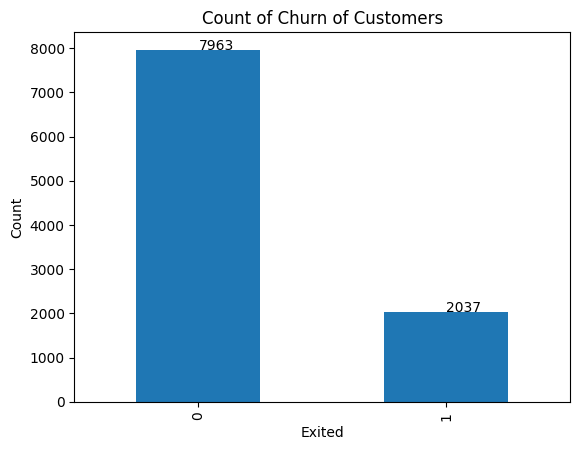

In [8]:
df1['Exited'].value_counts().plot(kind = 'bar')
for index, value in enumerate(df1['Exited'].value_counts()):
    plt.text(index, value, str(value))
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Count of Churn of Customers')

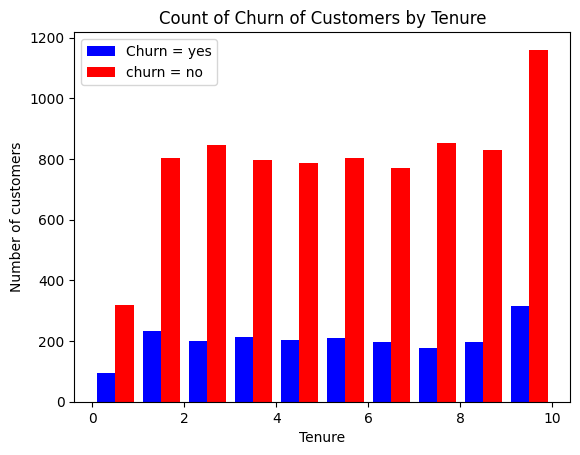

In [9]:
tenure_churn_yes = df1[df1.Exited == 1].Tenure
tenure_churn_No = df1[df1.Exited == 0].Tenure

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Count of Churn of Customers by Tenure')

plt.hist([tenure_churn_yes, tenure_churn_No], color = ['blue', 'red'], label = ['Churn = yes', 'churn = no'])
plt.legend()

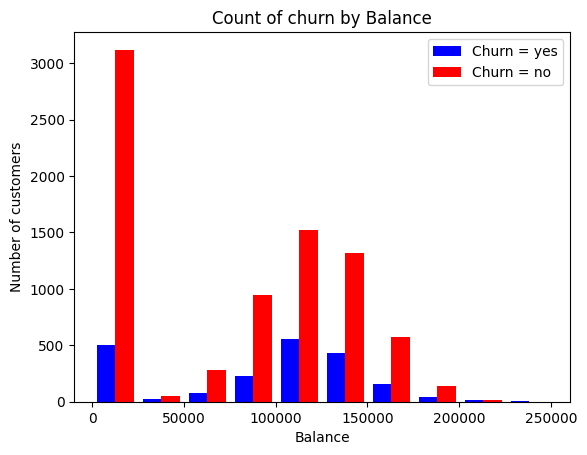

In [10]:
Balance_churn_yes = df1[df1.Exited == 1].Balance
Balance_churn_no = df1[df1.Exited == 0].Balance

plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.title('Count of churn by Balance')

plt.hist([Balance_churn_yes, Balance_churn_no], color = ['blue', 'red'], label = ['Churn = yes', 'Churn = no'])
plt.legend()

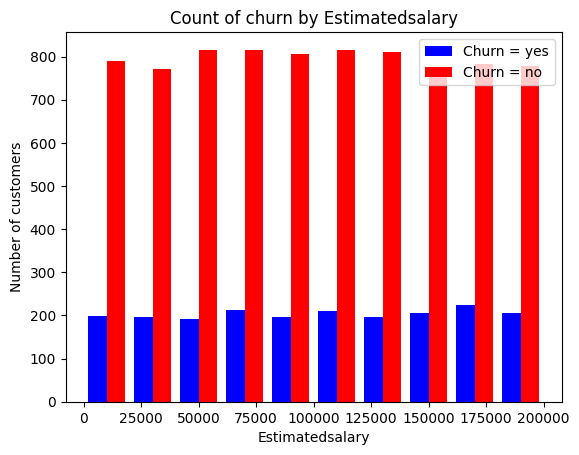

In [11]:
Estimatedsalary_churn_yes = df1[df1.Exited == 1].EstimatedSalary
Estimatedsalary_churn_no = df1[df1.Exited == 0].EstimatedSalary

plt.xlabel('Estimatedsalary')
plt.ylabel('Number of customers')
plt.title('Count of churn by Estimatedsalary')

plt.hist([Estimatedsalary_churn_yes, Estimatedsalary_churn_no], color = ['blue', 'red'], label = ['Churn = yes', 'Churn = no'])
plt.legend()

In [12]:
def print_column_unique_values(df):
    for colm in df:
        print(f'{colm}: {df1[colm].unique()}')

In [13]:
print_column_unique_values(df1)

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [14]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df1['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
df1['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2}, inplace = True)

C:\Users\laxma\AppData\Local\Temp\ipykernel_31232\3826321989.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
C:\Users\laxma\AppData\Local\Temp\ipykernel_31232\3826321989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gende

In [16]:
df1.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
print_column_unique_values(df1)

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [18]:
df2 = pd.get_dummies(data = df1, columns = ['Geography'])
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [19]:
df2.shape

(10000, 13)

In [20]:
colm_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
sacler = MinMaxScaler()
df2[colm_to_scale] = sacler.fit_transform(df2[colm_to_scale])

In [21]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [22]:
df2.dtypes

CreditScore        float64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geography_0           bool
Geography_1           bool
Geography_2           bool
dtype: object

In [23]:
Geography_col = ['Geography_0', 'Geography_1', 'Geography_2']

for col in Geography_col:
    df2[col].replace({'True': 1, 'False': 0}, inplace = True)

C:\Users\laxma\AppData\Local\Temp\ipykernel_31232\2722100216.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({'True': 1, 'False': 0}, inplace = True)


In [24]:
Geography_col = ['Geography_0', 'Geography_1', 'Geography_2']

for col in Geography_col:
    df2[col] = df2[col].astype(int)

In [25]:
df2.dtypes

CreditScore        float64
Gender               int64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geography_0          int64
Geography_1          int64
Geography_2          int64
dtype: object

In [26]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


In [27]:
x = df2.drop('Exited', axis = 1)
y = df2.Exited

In [28]:
y.shape

(10000,)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 12)
(7500,)
(2500, 12)
(2500,)


In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape = (12, ), activation = 'relu'),
    keras.layers.Dense(8, activation = 'relu'),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train, y_train, epochs = 50)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6908 - loss: 0.6153
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7986 - loss: 0.4844
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8019 - loss: 0.4657
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7992 - loss: 0.4605
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7965 - loss: 0.4523
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8079 - loss: 0.4338
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8146 - loss: 0.4255
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8157 - loss: 0.4100
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8320 - loss: 0.3846
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.3758
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8448 - loss: 0.3661
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [33]:
model.evaluate(x_test, y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8354 - loss: 0.3855


[0.36470115184783936, 0.8492000102996826]

In [34]:
yp = model.predict(x_test)
yp[:5]

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.48399287],
       [0.6136404 ],
       [0.6132644 ],
       [0.04657073],
       [0.7485963 ]], dtype=float32)

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:5]

[0, 1, 1, 0, 1]

In [37]:
y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

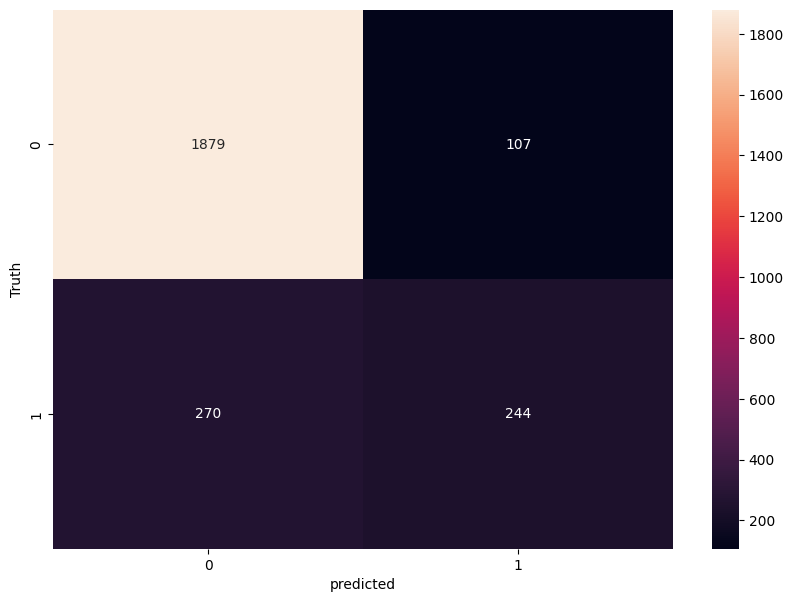

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1986
           1       0.70      0.47      0.56       514

    accuracy                           0.85      2500
   macro avg       0.78      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [40]:
accuracy = round((1929+197)/(1929+197+317+57), 2)
accuracy

0.85

In [41]:
precision_zero = round(1929/(1929+317), 2)
precision_zero

0.86

In [42]:
precision_one = round(197/(197+57), 2)
precision_one

0.78

In [43]:
recall_zero = round(1929/(1929+57), 2)
recall_zero

0.97

In [44]:
recall_one = round(197/(197+317), 2)
recall_one

0.38

In [45]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12, ), activation = 'relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(4, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(
        optimizer = 'adam',
        loss = loss,
        metrics = ['accuracy']
    )

    if weights == -1:
        model.fit(x_train, y_train, epochs = 50)
    else:
        model.fit(x_train, y_train, epochs = 50, class_weight = weights)

    print(model.evaluate(x_test, y_test))

    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)

    print('classification report: \n', classification_report(y_test, y_preds))

    return y_preds

UNDER SAMPLING

In [47]:
count_class_0, count_class_1 = df2.Exited.value_counts()

df_class_0 = df2[df2['Exited'] == 0]
df_class_1 = df2[df2['Exited'] == 1]

In [48]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
Exited
0    2037
1    2037
Name: count, dtype: int64


In [49]:
x = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [50]:
y_train.value_counts()

Exited
1    1630
0    1629
Name: count, dtype: int64

In [51]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4378 - loss: 0.7064
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5379 - loss: 0.6888
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5771 - loss: 0.6780
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5932 - loss: 0.6631
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6395 - loss: 0.6347
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6771 - loss: 0.6137
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6705 - loss: 0.6082
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6743 - loss: 0.6039
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6907 - loss: 0.5827
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6865 - loss: 0.5815
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6975 - loss: 0.5750
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

OVER SAMPLING

In [54]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
Exited
0    7963
1    7963
Name: count, dtype: int64


In [56]:
x = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [57]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [58]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50


C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5635 - loss: 0.6802
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6646 - loss: 0.6139
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6880 - loss: 0.5867
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7065 - loss: 0.5741
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7140 - loss: 0.5616
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7093 - loss: 0.5600
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7331 - loss: 0.5411
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7337 - loss: 0.5339
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7438 - loss: 0.5186
Epoch 10/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7547 - loss: 0.5003
Epoch 11/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7515 - loss: 0.4973
Epoch 12/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy

In [59]:
x = df2.drop('Exited',axis='columns')
y = df2['Exited']

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
y_train.value_counts()

Exited
0    6370
1    6370
Name: count, dtype: int64

In [64]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5227 - loss: 0.6913
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6334 - loss: 0.6448
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6918 - loss: 0.5868
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7251 - loss: 0.5380
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7522 - loss: 0.5038
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7594 - loss: 0.4837
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7630 - loss: 0.4820
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7599 - loss: 0.4839
Epoch 9/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7659 - loss: 0.4732
Epoch 10/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7694 - loss: 0.4720
Epoch 11/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7693 - loss: 0.4713
Epoch 12/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [66]:
df2.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [68]:
x = df2.drop('Exited',axis='columns')
y = df2['Exited']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15, stratify=y)

In [70]:
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [71]:
df3 = x_train.copy()
df3['Exited'] = y_train

In [72]:
df3.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_0,Geography_1,Geography_2,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,0,1,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,0,1,1
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [73]:
df3_class0 = df3[df3.Exited==0]
df3_class1 = df3[df3.Exited==1]

In [74]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    x_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return x_train, y_train 

In [79]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1630)

y_pred1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50


C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5290 - loss: 0.6895
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6166 - loss: 0.6715
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6321 - loss: 0.6653
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6602 - loss: 0.6460
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6727 - loss: 0.6429
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6748 - loss: 0.6344
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6855 - loss: 0.6245
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6819 - loss: 0.6156
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6713 - loss: 0.6211
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6805 - loss: 0.6140
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7062 - loss: 0.5964
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

In [80]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 1630, 3260)

y_pred2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50


C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4817 - loss: 0.6989
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6076 - loss: 0.6758
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6418 - loss: 0.6497
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6668 - loss: 0.6264
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6752 - loss: 0.6112
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6837 - loss: 0.5963
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6782 - loss: 0.5982
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6941 - loss: 0.5858
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6792 - loss: 0.5931
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6851 - loss: 0.5870
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7073 - loss: 0.5685
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

In [81]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 3260, 4890)

y_pred3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/50


C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4880 - loss: 0.6946
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6338 - loss: 0.6598
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6453 - loss: 0.6327
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6640 - loss: 0.6222
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6987 - loss: 0.5937
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7065 - loss: 0.5736
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7170 - loss: 0.5769
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7169 - loss: 0.5684
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7267 - loss: 0.5597
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7394 - loss: 0.5446
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7390 - loss: 0.5407
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy

In [82]:
x_train, y_train = get_train_batch(df3_class0, df3_class1, 4890, 6370)

y_pred4 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

C:\Users\laxma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5029 - loss: 0.6940
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5730 - loss: 0.6908
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6012 - loss: 0.6851
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6266 - loss: 0.6741
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6476 - loss: 0.6575
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6853 - loss: 0.6347
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6927 - loss: 0.6273
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6795 - loss: 0.6272
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6924 - loss: 0.6188
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6909 - loss: 0.6154
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7162 - loss: 0.5996
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7033 - lo

In [83]:
print(len(y_pred1))
print(len(y_pred2))
print(len(y_pred3))
print(len(y_pred4))

2000
2000
2000
2000


In [84]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i]
    if n_ones>2:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [85]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1593
           1       0.51      0.69      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000

